In [41]:
# Ignoring Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas_datareader as web
import pandas as pd
from yahoo_fin import stock_info as si
import datetime as dt
# yfinance is where we will pull our data from
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")
import numpy as np
import seaborn as sns

# Normalizing the Adjusted Close column and Saving into the Database

In [2]:
# Reading the stocks_adj_close.csv
stocks = pd.read_csv("stocks_adj_close.csv", index_col = [0], parse_dates = [0])
stocks.head()

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,19.963375,5.005957,37.928116,6.556004,21.944105,8.53,19.619041,33.540310,37.700001,23.353294,...,54.343529,29.609983,45.093864,13.622756,43.354244,32.392876,18.730406,54.986431,28.620001,11.777194
2010-01-06,19.892447,4.798555,38.258835,6.451721,21.736616,8.40,19.727999,33.896866,37.619999,23.308975,...,55.218384,29.282593,44.502361,13.648920,43.728966,32.606281,18.596510,54.968670,28.400000,12.801298
2010-01-07,19.866661,4.939965,38.249397,6.439795,21.388035,8.40,19.891426,33.865170,36.889999,23.124332,...,55.055614,29.151625,45.452759,13.590055,43.591572,33.033108,18.591158,56.229664,27.690001,14.235043
2010-01-08,19.860210,4.845691,38.400570,6.482610,21.620428,8.23,19.993120,33.730465,36.689999,23.257280,...,54.994595,28.883154,45.127102,13.596595,43.416714,33.033108,18.596510,55.048595,27.600000,14.004617
2010-01-11,19.873106,4.751417,38.022617,6.425421,21.861107,8.08,20.094807,33.698780,36.209999,23.124332,...,55.543926,29.073048,44.980888,13.727399,43.903843,33.459942,18.917879,56.265182,27.690001,14.089961


In [3]:
# Getting the tickers list
tickers = list(stocks.columns)

In [4]:
# As you can see all the stocks are not starting from same y value, 
# lets normalize the data and then plot and see the price fluctuations
# we will divide every row by the first row and multiply by 100 to covert it into %
# for example the following code is printing the normalized values of first column
# Lets normalize all the columns
# norm_adj_close = (stocks/(stocks.iloc[0]))*100
# norm_adj_close.head()

In [5]:
# Lets plot the normalized closed values
# norm_adj_close.plot(figsize = (15,8), fontsize = 12)
# plt.legend(loc = "upper left", fontsize = 12)
# plt.show()

In [6]:
# Merging into Database
# for ticker in tickers:
#     df = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
#     df['Normalized Adj Close'] = norm_adj_close[ticker]
#     df.to_csv(f'stock_data/{ticker}.csv')

In [7]:
start = '2010-01-01'
end = '2022-04-08'
# Load sp500_df return data for comparing the returns of individual stocks
sp500_df = web.DataReader('^GSPC', 'yahoo', start, end)
sp500_df['Percent Change'] = sp500_df['Adj Close'].pct_change()
sp500_return = (sp500_df['Percent Change'] + 1).cumprod()[-1]

In [8]:
sp500_df.head()

,High,Low,Open,Close,Volume,Adj Close,Percent Change
Date,,,,,,,
2010-01-04,1133.869995,1116.560059,1116.560059,1132.989990,3991400000,1132.989990,NaN
2010-01-05,1136.630005,1129.660034,1132.660034,1136.520020,2491020000,1136.520020,0.003116
2010-01-06,1139.189941,1133.949951,1135.709961,1137.140015,4972660000,1137.140015,0.000546
2010-01-07,1142.459961,1131.319946,1136.270020,1141.689941,5270680000,1141.689941,0.004001
2010-01-08,1145.390015,1136.219971,1140.520020,1144.979980,4389590000,1144.979980,0.002882


In [9]:
sp500_return

3.9614469888015336

In [10]:
# Lets figure out the best performers by comparing with the spy returns
# We will assign
return_list = []
for ticker in tickers:
    df = stocks[ticker]
    df['Percent Change'] = df.pct_change()
    stock_return = ((df['Percent Change'] + 1).cumprod())[-1]
    returns_compared = round((stock_return / sp500_return),2)
    return_list.append(returns_compared)

In [11]:
best_performers = pd.DataFrame(list(zip(tickers, return_list)), columns = ['Ticker', 'Returns Compared'])

In [12]:
best_performers

,Ticker,Returns Compared
0,A,1.71
1,AAL,0.84
2,AAP,1.50
3,AAPL,6.55
4,ABC,1.90
...,...,...
438,XRAY,0.37
439,YUM,1.61
440,ZBH,0.60
441,ZBRA,3.67


In [13]:
# Showing the ranking in percentile form
best_performers['Score'] = best_performers['Returns Compared'].rank(pct = True)*100

In [14]:
best_performers.head()

,Ticker,Returns Compared,Score
0,A,1.71,61.851016
1,AAL,0.84,23.363431
2,AAP,1.50,53.047404
3,AAPL,6.55,97.291196
4,ABC,1.90,67.945824


In [15]:
# Setting the condition of picking the stocks which are in top 70% quantile 
# We can do the same thing with sharpe ratio and other factors
best_performers = best_performers[best_performers['Score'] >= (best_performers['Score'].quantile(0.70))]

In [16]:
best_performers.sort_values(by = 'Score', ascending = False)

,Ticker,Returns Compared,Score
138,DXCM,14.70,100.000000
297,NVDA,13.54,99.774266
130,DPZ,13.53,99.548533
287,NFLX,12.21,99.322799
43,AVGO,10.18,99.097065
...,...,...,...
284,NDSN,2.04,70.993228
207,INCY,2.04,70.993228
86,CINF,2.03,70.654628
12,ADSK,2.02,70.316027


In [17]:
len(best_performers)

133

In [18]:
final_df = pd.DataFrame(columns = ['Tickers', 'Latest_Price', 'Score', 'PE_Ratio','PEG_Ratio','SMA_150', 'SMA_200', '52_week_low', '52_week_high'])

In [35]:
for ticker in best_performers['Ticker']:
    try:
        df = pd.read_csv(f'stock_data/{ticker}.csv', index_col = 0)
        moving_avg = [150, 200]
        for ma in moving_avg:
            df['SMA_'+str(ma)] = round(df['Adj Close'].rolling(window = int(ma)).mean(), 2)
        latest_price = df['Adj Close'][-1]
        pe_ratio = float(si.get_quote_table(ticker)['PE Ratio (TTM)'])
#         peg_ratio = float(si.get_stats_valuation(ticker)[1][4])
        moving_average_150 = df['SMA_150'][-1]
        moving_average_200 = df['SMA_200'][-1]
        low_52week = round(min(df['Low'][-(52*5):]), 2) # 5 days of trading times 52 week in a year
        high_52week = round(max(df['High'][-(52*5):]), 2)
        score = round(best_performers[best_performers['Ticker'] == ticker]['Score'].tolist()[0])
            
        # Conditions
        condition_1 = latest_price > moving_average_150 > moving_average_200
        condition_2 = latest_price >= (1.3 * low_52week)
        condition_3 = latest_price >= (0.75 * high_52week)
        condition_4 = pe_ratio < 40
#         condition_5 = peg_ratio < 2
            
        # Conditional
        if condition_1 and condition_4:            #condition_1 and condition_2 and condition_3 and 
            final_df = final_df.append({'Tickers': ticker,
                                        'Latest_Price': latest_price,
                                        'Score': score,
                                        'PE_Ratio': pe_ratio,
#                                         'PEG_Ratio': peg_ratio,
                                        'SMA_150': moving_average_150,
                                        'SMA_200': moving_average_200,
                                        '52_week_low': low_52week,
                                        '52_week_high': high_52week}, 
                                         ignore_index = True)
    
    except Exception as e:
        print(f"{e} for {ticker}")
              

In [36]:
final_df.sort_values(by = 'Score', ascending = False)
pd.set_option('display.max_columns', 10)
print(final_df)
final_df.to_csv('portfolio/portfolio1-SMA-PE.csv')

   Tickers Latest_Price Score PE_Ratio PEG_Ratio SMA_150 SMA_200 52_week_low  \
0     AAPL   170.089996    97    29.42       NaN  161.37  157.45      121.15   
1      ADP   237.710007    74    35.95       NaN  217.25  214.06      184.85   
2      AJG   183.190002    87    38.98       NaN  159.93  154.88      124.21   
3     ANTM   520.669983    81    23.08       NaN  433.27  419.78      349.05   
4     AVGO        587.0    99     39.1       NaN  564.28  540.98      419.14   
..     ...          ...   ...      ...       ...     ...     ...         ...   
85     TSN    92.440002    75     11.4       NaN   85.08   82.27       69.88   
86    ULTA   401.549988    96    26.65       NaN  382.35  375.39      299.77   
87     UNH   545.960022    95    33.15       NaN  462.12  449.55      360.55   
88     UNP   241.979996    78    25.94       NaN  238.44  233.23      195.68   
89     WRB    67.699997    74    12.48       NaN   55.48    53.8       47.13   

   52_week_high  
0        182.94  
1  

In [37]:
final_df

,Tickers,Latest_Price,Score,PE_Ratio,PEG_Ratio,SMA_150,SMA_200,52_week_low,52_week_high
0,AAPL,170.089996,97,29.42,NaN,161.37,157.45,121.15,182.94
1,ADP,237.710007,74,35.95,NaN,217.25,214.06,184.85,248.96
2,AJG,183.190002,87,38.98,NaN,159.93,154.88,124.21,183.85
3,ANTM,520.669983,81,23.08,NaN,433.27,419.78,349.05,526.62
4,AVGO,587.0,99,39.1,NaN,564.28,540.98,419.14,677.76
...,...,...,...,...,...,...,...,...,...
85,TSN,92.440002,75,11.4,NaN,85.08,82.27,69.88,100.72
86,ULTA,401.549988,96,26.65,NaN,382.35,375.39,299.77,422.43
87,UNH,545.960022,95,33.15,NaN,462.12,449.55,360.55,548.97
88,UNP,241.979996,78,25.94,NaN,238.44,233.23,195.68,278.94


# Visualization

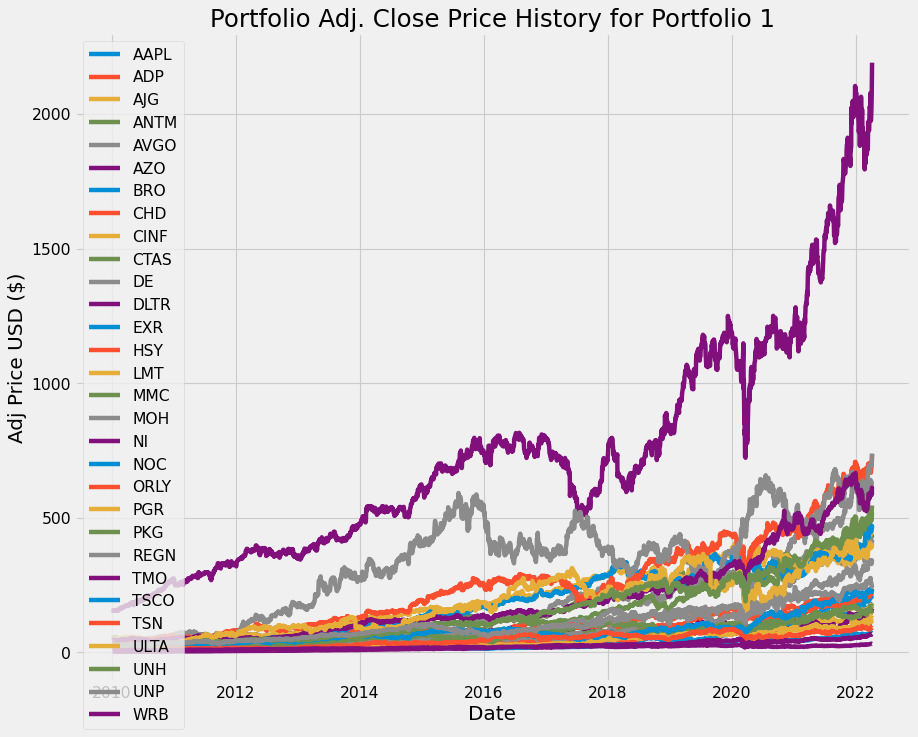

In [22]:
# Visually show the stock Portfolio
title = 'Portfolio Adj. Close Price History for Portfolio 1'

# Get the tickers for our Portfolio
my_stocks = final_df['Tickers']

# Create and plot the graph
plt.figure(figsize=(12, 10), dpi=80)
for ticker in my_stocks:
    df1 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    plt.plot(df1['Adj Close'], label = ticker)

plt.title(title, fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj Price USD ($)', fontsize = 18)
plt.legend(my_stocks, loc = 'upper left')
plt.savefig('figures/portfolio_1.png')
plt.savefig('figures/portfolio_1.pdf')
plt.show()

# Calculating Returns

In [23]:
# show the daily simple returns
portfolio = pd.DataFrame()
portfolio_returns = pd.DataFrame()
for ticker in my_stocks:
    df2 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    portfolio[ticker] = df2['Adj Close']
    portfolio_returns[ticker] = df2['Adj Close'].pct_change().dropna()
portfolio_returns

,AAPL,ADP,AJG,ANTM,AVGO,...,TSN,ULTA,UNH,UNP,WRB
Date,,,,,,,,,,,
2010-01-06,-0.015906,-0.002348,0.000450,0.016225,0.007895,...,0.050522,0.024520,0.009847,0.001508,0.002047
2010-01-07,-0.001849,-0.000470,-0.006301,0.037146,-0.006267,...,0.017557,0.085328,0.038377,-0.008886,0.004087
2010-01-08,0.006648,-0.001413,0.002717,0.004398,0.007357,...,-0.002251,0.035954,-0.009391,0.033885,-0.000814
2010-01-11,-0.008822,0.004479,0.001355,0.005787,0.006260,...,-0.013534,-0.015271,0.006728,-0.006614,0.002037
2010-01-12,-0.011375,-0.007041,0.005864,-0.013217,-0.015033,...,-0.011433,-0.006579,-0.026428,-0.002959,0.004065
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,0.023693,0.007195,-0.014059,-0.020007,0.012552,...,-0.013071,0.026789,-0.005014,-0.008540,-0.020056
2022-04-05,-0.018942,0.011991,0.005462,0.011117,-0.032653,...,0.003784,-0.000677,0.015176,-0.021844,0.006974
2022-04-06,-0.018451,-0.000882,0.023904,0.024435,-0.019736,...,0.007872,-0.017924,0.027020,-0.036413,0.005721


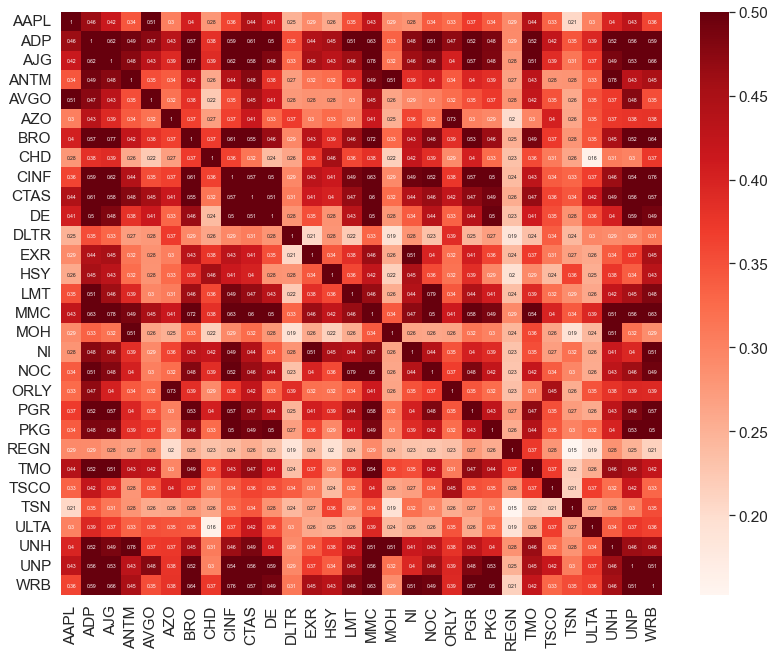

In [52]:
# Making a heat map representing the correlation matrix
plt.figure(figsize = (12, 10))
sns.set(font_scale = 1.4)
sns.heatmap(portfolio_returns.corr(), cmap = "Reds", annot = True, annot_kws = {"size": 5}, vmax = 0.5)
plt.savefig('figures/portfolio_1_hm.png')
plt.savefig('figures/portfolio_1_hm.pdf')
plt.show()

In [24]:
# Create and show the annualized covariance matrix
cov_matrix_annual = portfolio_returns.cov() * 252
cov_matrix_annual

,AAPL,ADP,AJG,ANTM,AVGO,...,TSN,ULTA,UNH,UNP,WRB
AAPL,0.078917,0.028334,0.023603,0.027754,0.050480,...,0.016609,0.033679,0.028626,0.030395,0.021987
ADP,0.028334,0.047538,0.027279,0.030718,0.036599,...,0.021639,0.034207,0.029244,0.030676,0.027852
AJG,0.023603,0.027279,0.040921,0.027646,0.030835,...,0.018171,0.029838,0.025154,0.027168,0.028844
ANTM,0.027754,0.030718,0.027646,0.082404,0.035805,...,0.023169,0.038149,0.057385,0.031290,0.027967
AVGO,0.050480,0.036599,0.030835,0.035805,0.125021,...,0.026296,0.049413,0.033666,0.042704,0.027031
AZO,0.019826,0.021920,0.018438,0.022699,0.026046,...,0.017475,0.032021,0.022291,0.022193,0.019137
BRO,0.024134,0.026633,0.033019,0.025858,0.028732,...,0.017076,0.029239,0.024431,0.027834,0.029452
CHD,0.015415,0.016508,0.015577,0.014805,0.015681,...,0.014973,0.012931,0.015612,0.014981,0.016056
CINF,0.025724,0.032632,0.031859,0.031991,0.031822,...,0.024163,0.037068,0.030051,0.034840,0.042129
CTAS,0.031336,0.033710,0.029583,0.034510,0.040373,...,0.024864,0.041858,0.031278,0.035343,0.031198


In [25]:
# Calculate the portfolio variance
# weights = np.full((1, 30), 0.033)
weights = np.empty(30); weights.fill(0.033)
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.026311199378498584

In [26]:
# Calculate portfolio Volatility aka Standard Deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.1622072728902702

In [27]:
# Calculate annual portfolio returns
port_simple_annual_return = np.sum(portfolio_returns.mean() * weights) * 252
port_simple_annual_return

0.24511213032280962

In [28]:
# Show the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_volatility = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(port_simple_annual_return, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual Volatility / Risk: '+ percent_volatility)
print('Annual Variance: '+ percent_var)

Expected annual return: 25.0%
Annual Volatility / Risk: 16.0%
Annual Variance: 3.0%


# Portfolio Optimization

In [29]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [30]:
# Portfolio Optimization

# Calculate the expected returns and the annualized samplecovariance matrix of asset returns
mu = expected_returns.mean_historical_return(portfolio)
S = risk_models.sample_cov(portfolio)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('AAPL', 0.12344), ('ADP', 0.0), ('AJG', 0.0), ('ANTM', 0.0), ('AVGO', 0.06178), ('AZO', 0.08931), ('BRO', 0.0), ('CHD', 0.08271), ('CINF', 0.0), ('CTAS', 0.02602), ('DE', 0.0), ('DLTR', 0.00073), ('EXR', 0.26258), ('HSY', 0.04427), ('LMT', 0.0), ('MMC', 0.0), ('MOH', 0.0), ('NI', 0.0), ('NOC', 0.02147), ('ORLY', 0.06878), ('PGR', 0.0), ('PKG', 0.0), ('REGN', 0.05114), ('TMO', 0.0), ('TSCO', 0.05498), ('TSN', 0.00207), ('ULTA', 0.0), ('UNH', 0.11073), ('UNP', 0.0), ('WRB', 0.0)])
Expected annual return: 28.0%
Annual volatility: 16.9%
Sharpe Ratio: 1.54


(0.2795098180217973, 0.1686466303377638, 1.5387785543183021)

In [40]:
# Get discrete allocation of each share per stock
# need to install this package by running the command through terminal            conda install -c conda-forge cvxopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: '+ str(allocation))
print('Funds Remaining: ${:.2f}'.format(leftover))

Discrete Allocation: {'AAPL': 10, 'AVGO': 1, 'AZO': 1, 'CHD': 12, 'CTAS': 1, 'EXR': 18, 'HSY': 3, 'NI': 1, 'NOC': 1, 'ORLY': 1, 'REGN': 1, 'TSCO': 3, 'UNH': 3}
Funds Remaining: $15.04


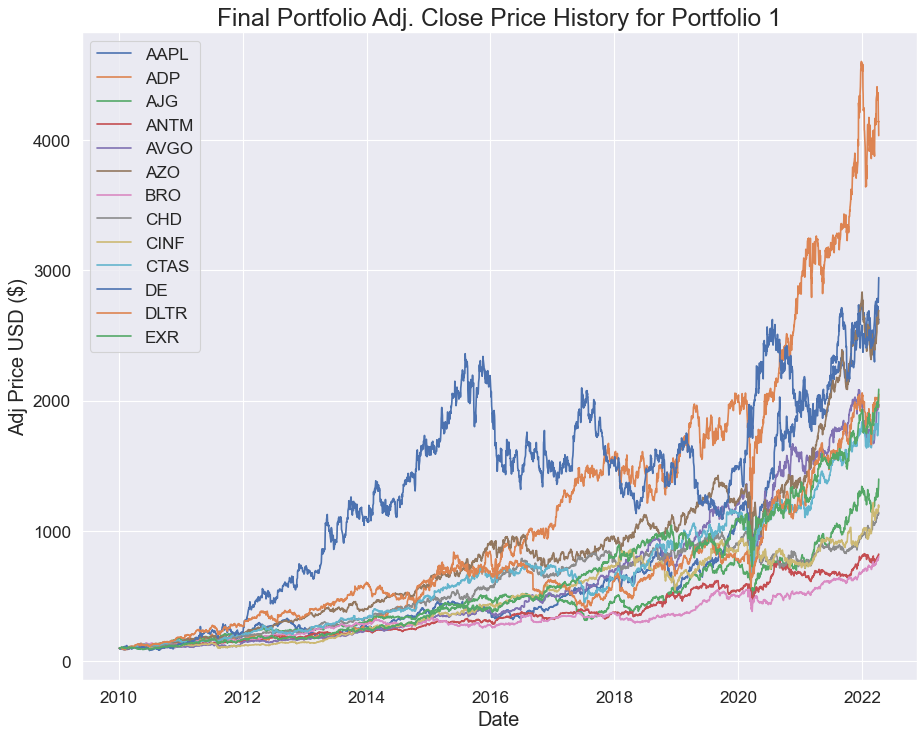

In [45]:
# Visually show the stock Portfolio
title = 'Final Portfolio Adj. Close Price History for Portfolio 1'

# Get the tickers for our Portfolio
stocks_to_invest = list()
for i in allocation.keys():
    stocks_to_invest.append(i)
stocks_to_invest

# Create and plot the graph
plt.figure(figsize=(12, 10), dpi=80)
for ticker in stocks_to_invest:
    df1 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    plt.plot(df1['Normalized Adj Close'], label = ticker)

plt.title(title, fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj Price USD ($)', fontsize = 18)
plt.legend(my_stocks, loc = 'upper left')
plt.savefig('figures/portfolio_1_final.png')
plt.savefig('figures/portfolio_1_final.pdf')
plt.show()

In [54]:
# show the daily simple returns
final_portfolio = pd.DataFrame()
final_portfolio_returns = pd.DataFrame()
for ticker in stocks_to_invest:
    df3 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    final_portfolio[ticker] = df3['Adj Close']
    final_portfolio_returns[ticker] = df3['Adj Close'].pct_change().dropna()
final_portfolio_returns

,AAPL,AVGO,AZO,CHD,CTAS,...,NOC,ORLY,REGN,TSCO,UNH
Date,,,,,,,,,,,
2010-01-06,-0.015906,0.007895,-0.009380,0.004793,0.002657,...,0.003863,-0.004409,-0.015139,-0.002084,0.009847
2010-01-07,-0.001849,-0.006267,0.013270,-0.011184,0.008706,...,0.010320,-0.003126,-0.006068,0.013670,0.038377
2010-01-08,0.006648,0.007357,-0.012842,-0.002162,0.009756,...,-0.005540,-0.008884,-0.008140,-0.000562,-0.009391
2010-01-11,-0.008822,0.006260,0.001288,-0.004334,-0.004088,...,0.001045,0.005273,0.019286,-0.008058,0.006728
2010-01-12,-0.011375,-0.015033,-0.002187,0.025448,-0.013433,...,0.001043,0.018883,-0.013285,0.000378,-0.026428
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,0.023693,0.012552,0.021205,-0.005426,0.012598,...,-0.005497,0.029097,0.005152,0.004279,-0.005014
2022-04-05,-0.018942,-0.032653,0.012473,0.000893,0.005079,...,0.003803,0.005300,-0.009937,-0.013967,0.015176
2022-04-06,-0.018451,-0.019736,0.015292,0.011695,-0.000580,...,0.016409,0.015424,0.024426,0.001871,0.027020


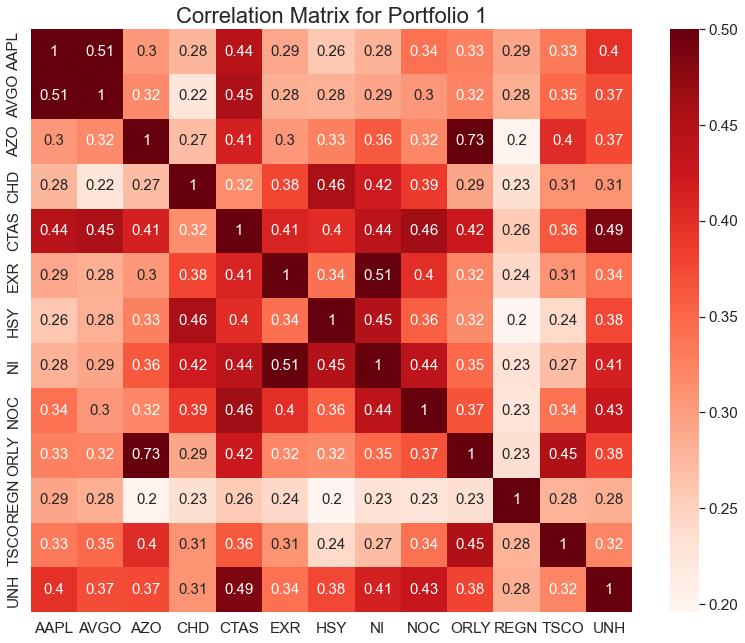

In [56]:
# Making a heat map representing the correlation matrix
title1 = "Correlation Matrix for Portfolio 1"

plt.figure(figsize = (12, 10))
sns.set(font_scale = 1.4)
sns.heatmap(final_portfolio_returns.corr(), cmap = "Reds", annot = True, annot_kws = {"size": 15}, vmax = 0.5)
plt.title(title1, fontsize = 22)
plt.savefig('figures/final_portfolio_1_hm.png')
plt.savefig('figures/final_portfolio_1_hm.pdf')
plt.show()

# Rough Work

In [ ]:
si.get_quote_table(ticker)

In [ ]:
si.get_stats_valuation(ticker)

In [ ]:
weights = np.empty(30); weights.fill(0.033)

In [ ]:
weights.T